In [1]:
%matplotlib inline
import time 
from qutip import mesolve, steadystate
import numpy as np
import matplotlib.pyplot as plt
#from importlib import reload

# custom scripts 
import optical as EM
import phonons as RC
import leads as FL
from utils import *
from photocell_setup import *
from style import *

utils imported


In [232]:
plt.style.use('ggplot')
plt.rcParams["axes.grid"] = True
plt.rc('grid', linestyle="--", color='grey')
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.3
plt.rcParams['lines.linewidth'] = 2.3
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} ')
colours = ['#1E90FF', '#3CB371', '#FFA500', '#FF0000']


colors = [c['color'] for c in plt.rcParams['axes.prop_cycle']]
colors+=colours

In [152]:
def plot_voltage_current_only(data_dict, label=None, plot_CC=False,
                         fig = None, ax= (None, None), IV_lab=None, limit_y=False, y_offset=0):
    # if 
    _PARAMS = data_dict['PARAMS']
    if fig==None:
        fig, ax = plt.subplots(1, 1, figsize=(8,10), sharex=True)
    
    X = data_dict['bias_voltages']
    
    ax.set_xlabel('Bias voltage (eV)')
    ax.set_ylabel('Current')
    #ax1.plot(X, np.array(data_dict['ground_population']).real, label=r'v')
    #ax1.plot(X, np.array(data_dict['hole_population']).real, label=r'h')
    #ax1.plot(X, np.array(data_dict['electron_population']).real, label=r'e')
    #ax1.plot(X, np.array(data_dict['exciton_population']).real, label=r'exc')
    #plt.subplots_adjust(left=0.18, bottom=0.065, right=0.97, top=0.98, wspace=0.24, hspace=0.015)
    q = 1.602176634e-19 # coulomb
    current = np.array(data_dict['current']).real # in electrons per second?
    ax.plot(X, current, label=IV_lab)
    if limit_y:
        ax.set_ylim(-short_current(X,current)*0.1+y_offset, short_current(X,current)*1.3+y_offset)
        ax.set_xlim(0, estimate_Voc(X,current)*1.1)
    if label:
        plt_title = "PLOTS/I-V-{}.pdf".format(label)
        plt.savefig(plt_title)
        print("saved at "+plt_title)

# I-V diagram: $\mu$ is central in bandgap

In [209]:
omega_v = 300e-3
num_voltages = 100

PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0., radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=2, silent=True, T_C=50.)
data_dict_no_BE_1 = populations_and_current_vs_voltage(PARAMS, x_range=[0.3,2.3], num_voltages=num_voltages)

PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0.02*omega_v, radiative_lifetime=1, 
                      alpha_ph=0, mu=700e-3, bias_voltage=0, N=2, silent=True, T_C=50.)

data_dict_1 = populations_and_current_vs_voltage(PARAMS, x_range=[0.3,2.3], num_voltages=num_voltages)

PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0.04*omega_v, radiative_lifetime=1, 
                      alpha_ph=0, mu=700e-3, bias_voltage=0, N=2, silent=True, T_C=50.)

data_dict_2 = populations_and_current_vs_voltage(PARAMS, x_range=[0.3,2.3], num_voltages=num_voltages)

PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0.06*omega_v, radiative_lifetime=1, 
                      alpha_ph=0, mu=700e-3, bias_voltage=0, N=2, silent=True, T_C=50.)

data_dict_3 = populations_and_current_vs_voltage(PARAMS, x_range=[1.2,2.3], num_voltages=num_voltages)

C-V data calculated in 75.0 seconds
C-V data calculated in 68.1 seconds


KeyboardInterrupt: 

saved at PLOTS/C-V-mu-central.pdf


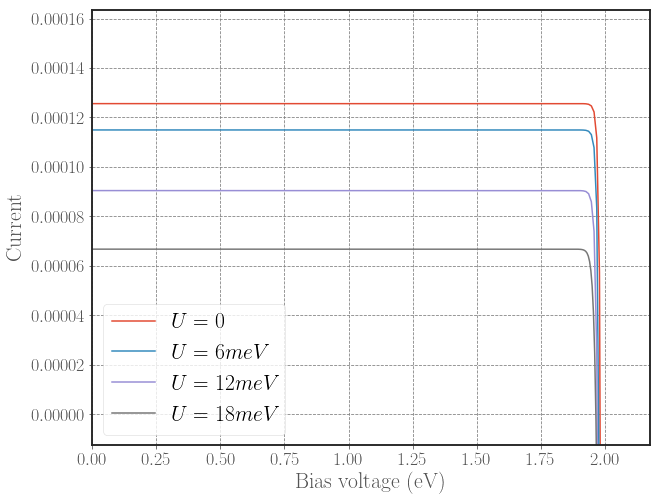

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(10,8), sharex=True)
plot_voltage_current_only(data_dict_no_BE_1, fig=fig, ax=ax, IV_lab=r"$U=0$", limit_y=True)
plot_voltage_current_only(data_dict_1, fig=fig, ax=ax, IV_lab=r"$U=6meV$")
plot_voltage_current_only(data_dict_2, fig=fig, ax=ax, IV_lab=r"$U=12meV$")
plot_voltage_current_only(data_dict_3, fig=fig, ax=ax, IV_lab=r"$U=18meV$", label='mu-central')
ax.legend()

saved at PLOTS/C-V-central.pdf


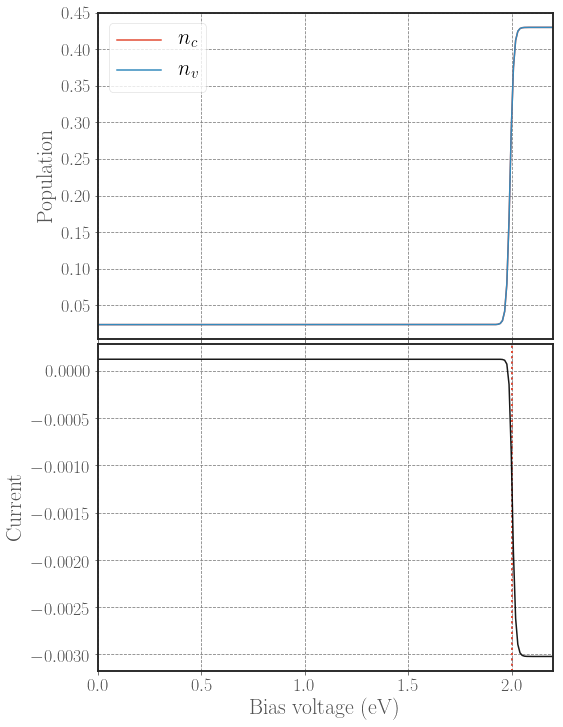

In [148]:
plot_voltage_current(data_dict_no_BE_1, label='central', plot_CC=False,
                         fig = None, ax= (None, None), IV_lab=None, limit_y=False, y_offset=0)

# I-V diagram: $\mu$ is above bandgap

In [155]:
omega_v = 300e-3
mu = 800e-3
num_voltages = 100
PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0., radiative_lifetime=1, alpha_ph=0, mu=mu,
                      bias_voltage=0, N=2, silent=True, T_C=50.)
data_dict_no_BE_2 = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)

PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0.02*omega_v, radiative_lifetime=1, 
                      alpha_ph=0, mu=mu, bias_voltage=0, N=2, silent=True, T_C=50.)

data_dict_1 = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)

PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0.04*omega_v, radiative_lifetime=1, 
                      alpha_ph=0, mu=mu, bias_voltage=0, N=2, silent=True, T_C=50.)

data_dict_2 = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)

PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0.06*omega_v, radiative_lifetime=1, 
                      alpha_ph=0, mu=mu, bias_voltage=0, N=2, silent=True, T_C=50.)

data_dict_3 = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)

C-V data calculated in 70.3 seconds
C-V data calculated in 70.3 seconds
C-V data calculated in 70.4 seconds
C-V data calculated in 71.6 seconds


saved at PLOTS/I-V-mu-above.pdf


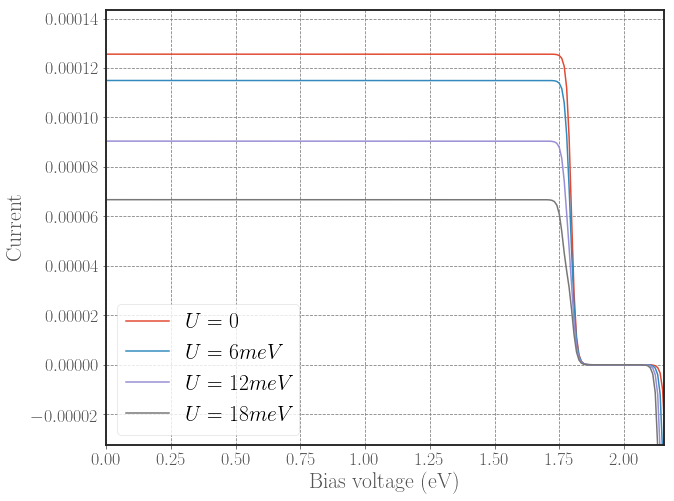

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(10,8), sharex=True)
plot_voltage_current_only(data_dict_no_BE_2, fig=fig, ax=ax, IV_lab=r"$U=0$", limit_y=True, y_offset=-2e-5)
plot_voltage_current_only(data_dict_1, fig=fig, ax=ax, IV_lab=r"$U=6meV$")
plot_voltage_current_only(data_dict_2, fig=fig, ax=ax, IV_lab=r"$U=12meV$")
plot_voltage_current_only(data_dict_3, fig=fig, ax=ax, IV_lab=r"$U=18meV$", label='mu-above')
ax.legend()

saved at PLOTS/I-V-pop-above.pdf


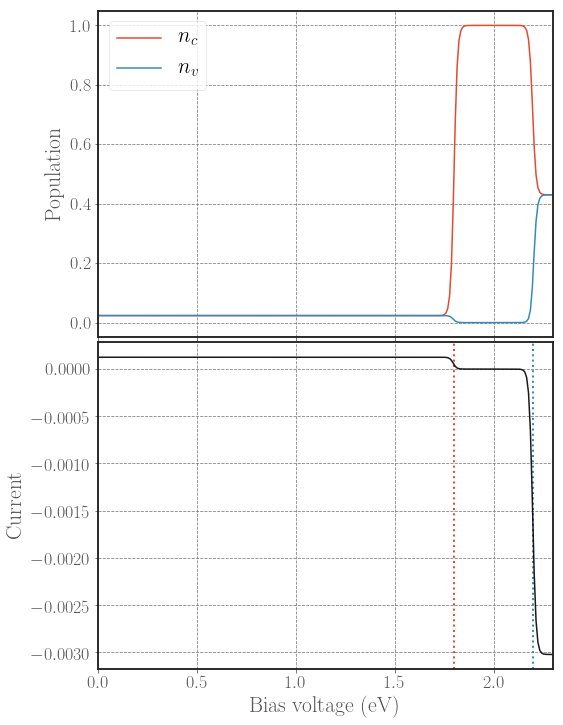

In [157]:
plot_voltage_current(data_dict_no_BE_2, label='above', plot_CC=False,
                         fig = None, ax= (None, None), IV_lab=None, limit_y=False, y_offset=0)

saved at PLOTS/P-V-mu-above.pdf


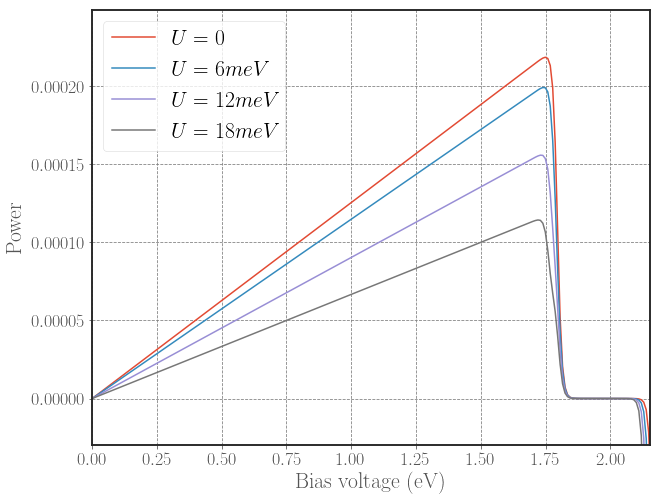

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(10,8), sharex=True)
plot_power_current_only(data_dict_no_BE_2, fig=fig, ax=ax, IV_lab=r"$U=0$", limit_y=True, y_offset=3e-5)
plot_power_current_only(data_dict_1, fig=fig, ax=ax, IV_lab=r"$U=6meV$")
plot_power_current_only(data_dict_2, fig=fig, ax=ax, IV_lab=r"$U=12meV$")
plot_power_current_only(data_dict_3, fig=fig, ax=ax, IV_lab=r"$U=18meV$", label='mu-above')
ax.legend()

In [109]:
omega_v = 300e-3
mu = 800e-3
num_voltages = 100
T_C = 300
PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0., radiative_lifetime=1, alpha_ph=0, mu=mu,
                      bias_voltage=0, N=2, silent=True, T_C=T_C)
data_dict_no_BE = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)

PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0.02*omega_v, radiative_lifetime=1, 
                      alpha_ph=0, mu=mu, bias_voltage=0, N=2, silent=True, T_C=T_C)

data_dict_1 = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)

PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0.04*omega_v, radiative_lifetime=1, 
                      alpha_ph=0, mu=mu, bias_voltage=0, N=2, silent=True, T_C=T_C)

data_dict_2 = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)

PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0.06*omega_v, radiative_lifetime=1, 
                      alpha_ph=0, mu=mu, bias_voltage=0, N=2, silent=True, T_C=T_C)

data_dict_3 = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)


C-V data calculated in 43.2 seconds
C-V data calculated in 40.5 seconds
C-V data calculated in 39.6 seconds
C-V data calculated in 38.0 seconds


saved at PLOTS/C-V-mu-below.pdf


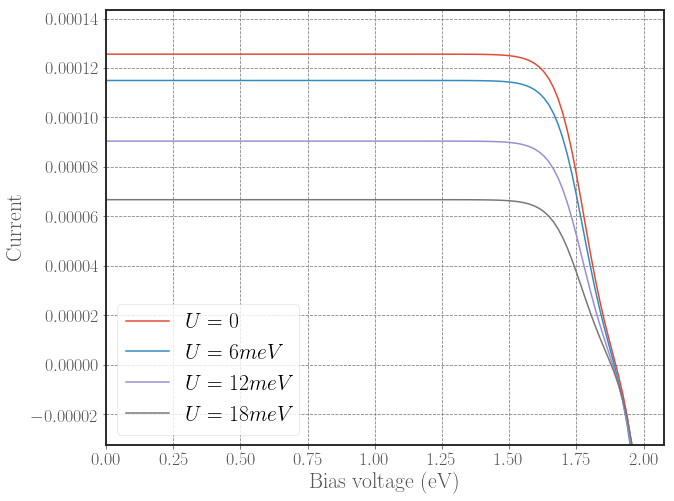

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(10,8), sharex=True)
plot_voltage_current_only(data_dict_no_BE, fig=fig, ax=ax, IV_lab=r"$U=0$", limit_y=True, y_offset=-2e-5)
plot_voltage_current_only(data_dict_1, fig=fig, ax=ax, IV_lab=r"$U=6meV$")
plot_voltage_current_only(data_dict_2, fig=fig, ax=ax, IV_lab=r"$U=12meV$")
plot_voltage_current_only(data_dict_3, fig=fig, ax=ax, IV_lab=r"$U=18meV$", label='mu-below')
ax.legend()

# Plotting Triptychs

saved at PLOTS/I-V-pop-central.pdf
saved at PLOTS/I-V-pop-above.pdf
saved at PLOTS/I-V-pop-below.pdf


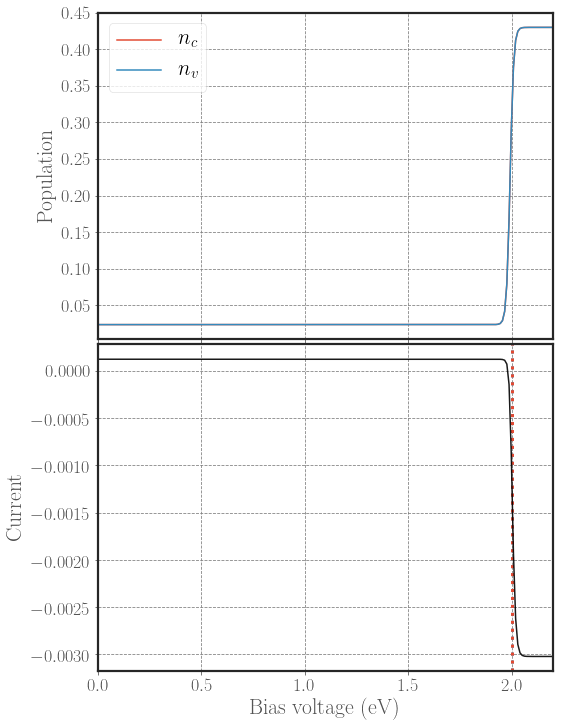

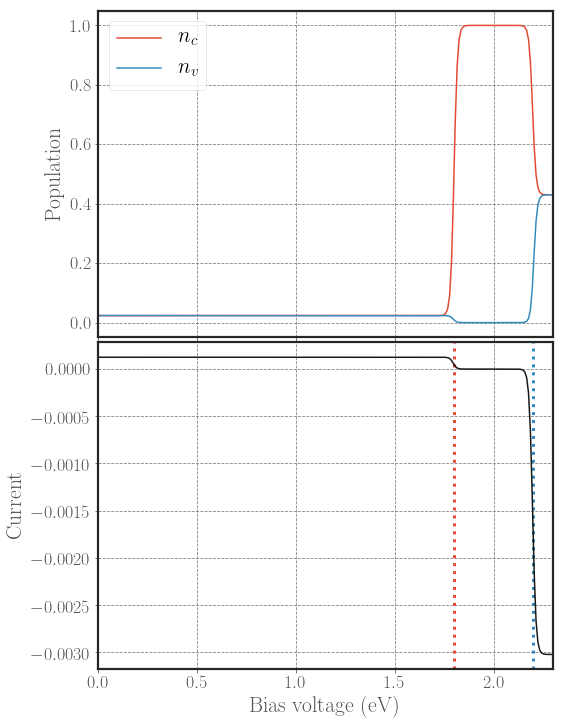

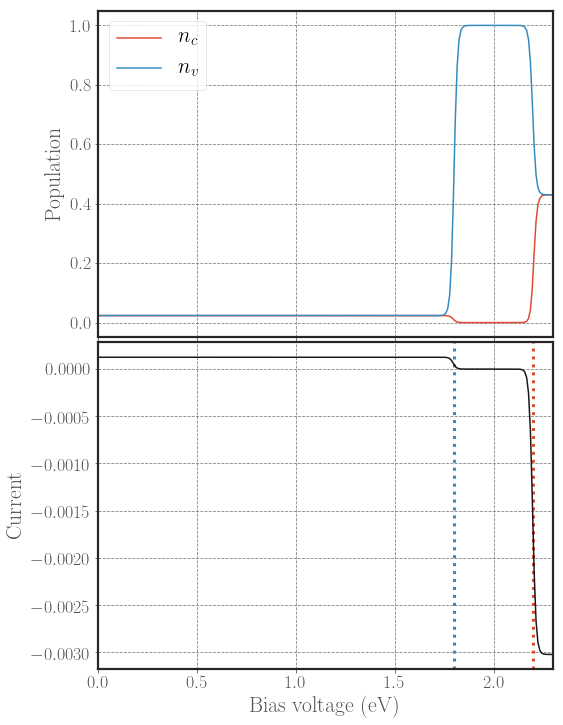

In [175]:
plot_voltage_current(data_dict_no_BE_1, label='central', plot_CC=False,
                         fig = None, ax= (None, None), IV_lab=None, limit_y=False, y_offset=0)
plot_voltage_current(data_dict_no_BE_2, label='above', plot_CC=False,
                         fig = None, ax= (None, None), IV_lab=None, limit_y=False, y_offset=0)
plot_voltage_current(data_dict_no_BE_3, label='below', plot_CC=False,
                         fig = None, ax= (None, None), IV_lab=None, limit_y=False, y_offset=0)

saved at PLOTS/T1-no-BE.pdf


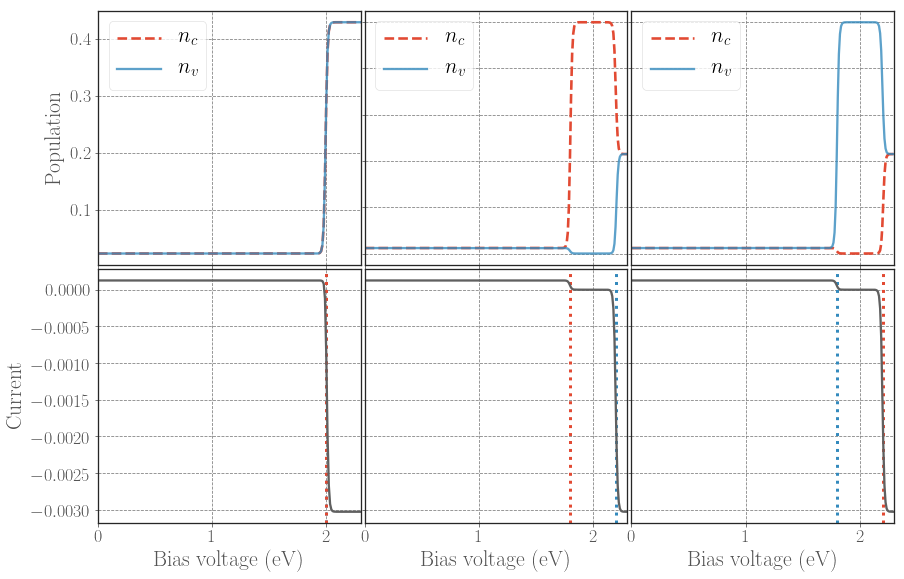

In [253]:


def plot_triptych(dd1, dd2, dd3, label=None):
    fig, axs = plt.subplots(2, 3, figsize=(14,8), sharex=True)
    for i, dd in zip(range(3), [dd1, dd2, dd3]):
        plot_voltage_current(dd, label=None, plot_CC=False,
                         fig = fig, axes= (axs[0,i], axs[1,i]), limit_y=False, y_offset=0)
    plt.subplots_adjust(left=0.18, bottom=0.09, right=0.97, top=0.98, wspace=0.015, hspace=0.015)

    for ax in axs.flat:
        ax.label_outer()
    if label:
        plot_name = "PLOTS/T"+label+".pdf"
        plt.savefig(plot_name)
        print("saved at "+plot_name)
plot_triptych(data_dict_no_BE_1, 
              data_dict_no_BE_2, 
              data_dict_no_BE_3, label="1-no-BE")

saved at PLOTS/T1-BE.pdf


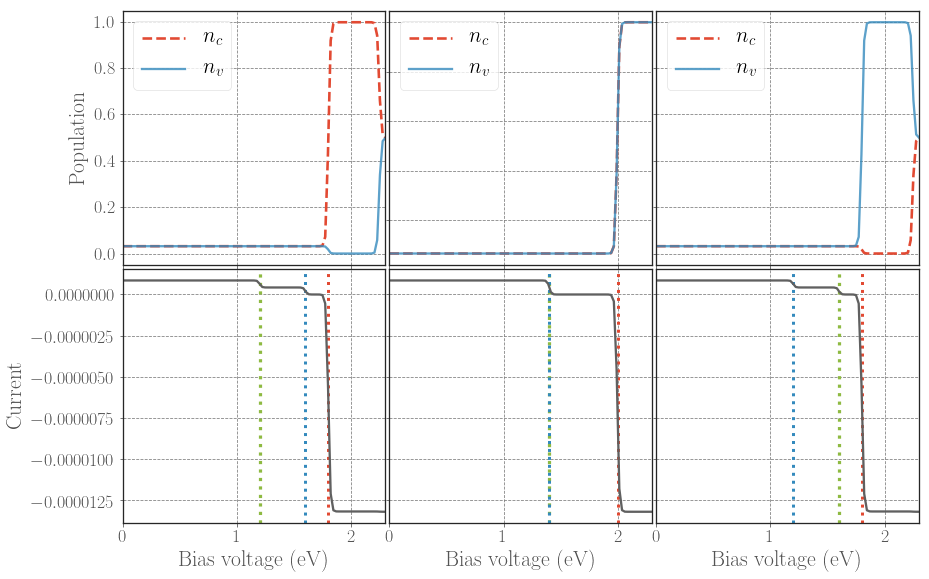

In [254]:
plot_triptych(data_dict_BE_1, 
              data_dict_BE_2, 
              data_dict_BE_3, label="1-BE")

C-V data calculated in 71.0 seconds
saved at PLOTS/C-V-below.pdf


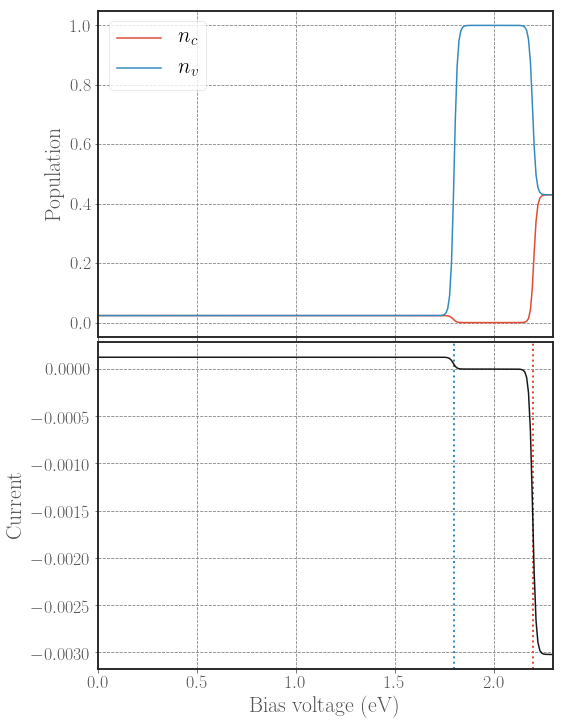

In [151]:
omega_v = 300e-3
mu = 600e-3
num_voltages = 100
PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=0., radiative_lifetime=1, alpha_ph=0, mu=mu,
                      bias_voltage=0, N=2, silent=True, T_C=50.)
data_dict_no_BE_3 = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)



In [154]:
def plot_power_current_only(data_dict, label=None, plot_CC=False,
                         fig = None, ax= (None, None), IV_lab=None, limit_y=False, y_offset=0):
    # if 
    _PARAMS = data_dict['PARAMS']
    if fig==None:
        fig, ax = plt.subplots(1, 1, figsize=(8,10), sharex=True)
    
    X = data_dict['bias_voltages']
    
    ax.set_xlabel('Bias voltage (eV)')
    ax.set_ylabel('Power')
    
    q = 1.602176634e-19 # coulomb
    current = np.array(data_dict['current']).real # in electrons per second?
    power = power_values(X, current)
    ax.plot(X, power, label=IV_lab)
    if limit_y:
        ax.set_ylim(0-y_offset, max(power)*1.+y_offset)
        ax.set_xlim(0, estimate_Voc(X,current)*1.1)
    if label:
        plt_title = "PLOTS/P-V-{}.pdf".format(label)
        plt.savefig(plt_title)
        print("saved at "+plt_title)

saved at PLOTS/P-V-mu-below.pdf


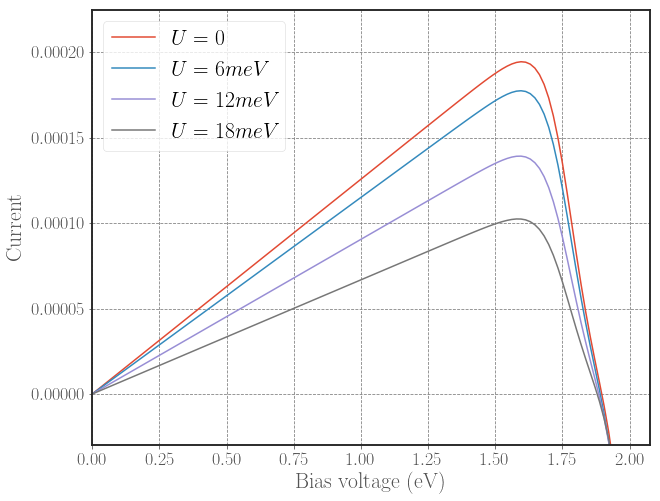

In [122]:
plot_voltage_current(data_dict_no_BE_3, label='below', plot_CC=False,
                         fig = None, ax= (None, None), IV_lab=None, limit_y=False, y_offset=0)

In [252]:
def plot_voltage_current(data_dict, label=None, plot_CC=False,
                         fig = None, axes= (None, None), IV_lab=None, limit_y=False, y_offset=0):
    # if 
    _PARAMS = data_dict['PARAMS']
    if fig==None:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,10), sharex=True)
    else:
        (ax1, ax2) = axes
        
    X = data_dict['bias_voltages']
    red_mu_R, red_mu_L = _PARAMS['omega_c'], 2*_PARAMS['mu']-_PARAMS['omega_c']
    blue_mu_R  = 2*_PARAMS['mu']+(_PARAMS['omega_v']-_PARAMS['binding_energy'])
    blue_mu_L = -(_PARAMS['omega_v']-_PARAMS['binding_energy'])
    
    
    if abs(_PARAMS['binding_energy'])>0:
        yellow_mu_R = _PARAMS['omega_c']-_PARAMS['binding_energy']
        yellow_mu_L = 2*_PARAMS['mu']-(_PARAMS['omega_c']-_PARAMS['binding_energy'])
        yellow_mu_R/= ev_to_inv_cm
        yellow_mu_L/= ev_to_inv_cm
        ax2.axvline(yellow_mu_R - yellow_mu_L, linestyle='dotted', color=colors[5], linewidth=3.2)
        if _PARAMS['mu']<(_PARAMS['bandgap']/2):
            red_mu_R = 2*_PARAMS['mu']+_PARAMS['omega_v']
            red_mu_L = 2*_PARAMS['mu']-(red_mu_R)
    red_mu_R /= ev_to_inv_cm
    red_mu_L /= ev_to_inv_cm
    blue_mu_R/= ev_to_inv_cm
    blue_mu_L/= ev_to_inv_cm
    
    ax2.axvline(blue_mu_R-blue_mu_L, linestyle='dotted', color=colors[1], linewidth=3)
    ax2.axvline(red_mu_R-red_mu_L, linestyle='dotted', color=colors[0], linewidth=3)
    if plot_CC:
        ax1.plot(X, np.array(data_dict['CC_population']).real, label=r'$n_{CC}$')
    else:
        ax1.plot(X, np.array(data_dict['conduction_population']).real, label=r'$n_c$', 
                 ls="dashed", linewidth=2.6, alpha=1.)
        ax1.plot(X, np.array(data_dict['valence_population']).real, label=r'$n_v$', alpha=0.8)
        #ax1.plot(X, np.array(data_dict['exciton_population']).real, label=r'$n_x$')
        
    ax1.set_ylabel('Population')
    ax2.set_xlabel('Bias voltage (eV)')
    ax2.set_ylabel('Current')
    
    plt.subplots_adjust(left=0.18, bottom=0.065, right=0.97, top=0.98, wspace=0.24, hspace=0.015)
    ax1.legend()
    current = np.array(data_dict['current']).real # in electrons per second?
    ax2.plot(X, current, label=IV_lab, color='#606060')
    ax1.set_xlim(0, X[-1])
    if limit_y:
        ax2.set_ylim(-short_current(X,current)*0.1+y_offset, short_current(X,current)*1.3+y_offset)
        ax2.set_xlim(0, estimate_Voc(X,current)*1.1)
    if label:
        plt_title = "PLOTS/I-V-pop-{}.pdf".format(label)
        plt.savefig(plt_title)
        print("saved at "+plt_title)

saved at PLOTS/I-V-pop-above.pdf


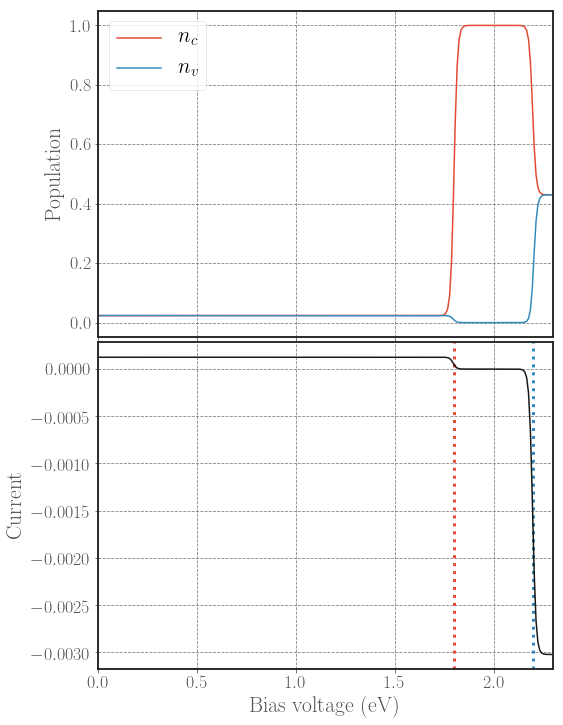

In [169]:
plot_voltage_current(data_dict_no_BE, label='above', plot_CC=False,
                         fig = None, ax= (None, None), IV_lab=None, limit_y=False, y_offset=0)

In [ ]:
def plot_voltage_current_only(data_dict, label=None, plot_CC=False,
                         fig = None, ax= (None, None), IV_lab=None, limit_y=False, y_offset=0):
    # if 
    _PARAMS = data_dict['PARAMS']
    if fig==None:
        fig, ax = plt.subplots(1, 1, figsize=(8,10), sharex=True)
    
    X = data_dict['bias_voltages']
    
    ax.set_xlabel('Bias voltage (eV)')
    ax.set_ylabel('Current')
    #ax1.plot(X, np.array(data_dict['ground_population']).real, label=r'v')
    #ax1.plot(X, np.array(data_dict['hole_population']).real, label=r'h')
    #ax1.plot(X, np.array(data_dict['electron_population']).real, label=r'e')
    #ax1.plot(X, np.array(data_dict['exciton_population']).real, label=r'exc')
    #plt.subplots_adjust(left=0.18, bottom=0.065, right=0.97, top=0.98, wspace=0.24, hspace=0.015)
    q = 1.602176634e-19 # coulomb
    current = np.array(data_dict['current']).real # in electrons per second?
    ax.plot(X, current, label=IV_lab)
    if limit_y:
        ax.set_ylim(-short_current(X,current)*0.1+y_offset, short_current(X,current)*1.3+y_offset)
        ax.set_xlim(0, estimate_Voc(X,current)*1.1)
    if label:
        plt_title = "PLOTS/C-V-{}.pdf".format(label)
        plt.savefig(plt_title)
        print("saved at "+plt_title)

# Triptych with binding energy

In [166]:
omega_v = 300e-3
mu = 800e-3
num_voltages = 40
U = 300e-3
PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=U, radiative_lifetime=1, alpha_ph=0, mu=mu,
                      bias_voltage=0, N=2, silent=True, T_C=50.)
data_dict_BE_1 = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)


mu = 700e-3
PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=U, radiative_lifetime=1, alpha_ph=0, mu=mu,
                      bias_voltage=0, N=2, silent=True, T_C=50.)
data_dict_BE_2 = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)

mu = 600e-3
PARAMS = PARAMS_setup(valence_energy=omega_v, binding_energy=U, radiative_lifetime=1, alpha_ph=0, mu=mu,
                      bias_voltage=0, N=2, silent=True, T_C=50.)
data_dict_BE_3 = populations_and_current_vs_voltage(PARAMS, x_range=[0.6,2.3], num_voltages=num_voltages)



C-V data calculated in 29.5 seconds
C-V data calculated in 28.4 seconds
C-V data calculated in 27.4 seconds


saved at PLOTS/I-V-pop-BE-above.pdf
saved at PLOTS/I-V-pop-BE-central.pdf
saved at PLOTS/I-V-pop-BE-below.pdf


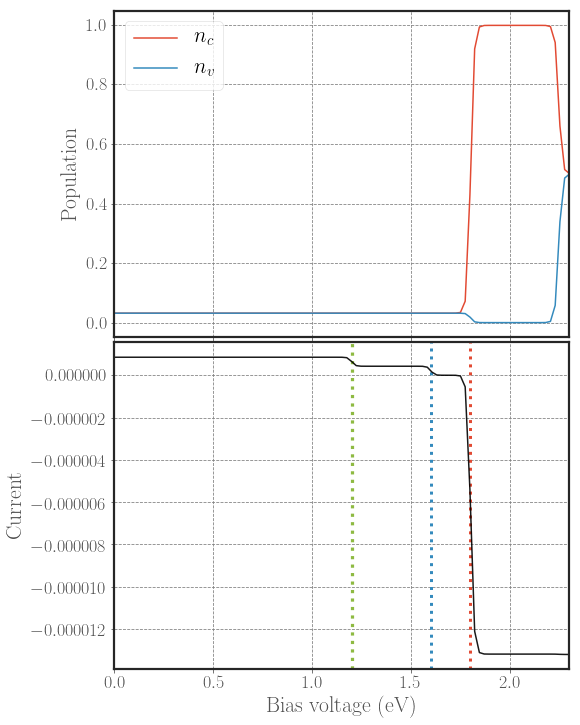

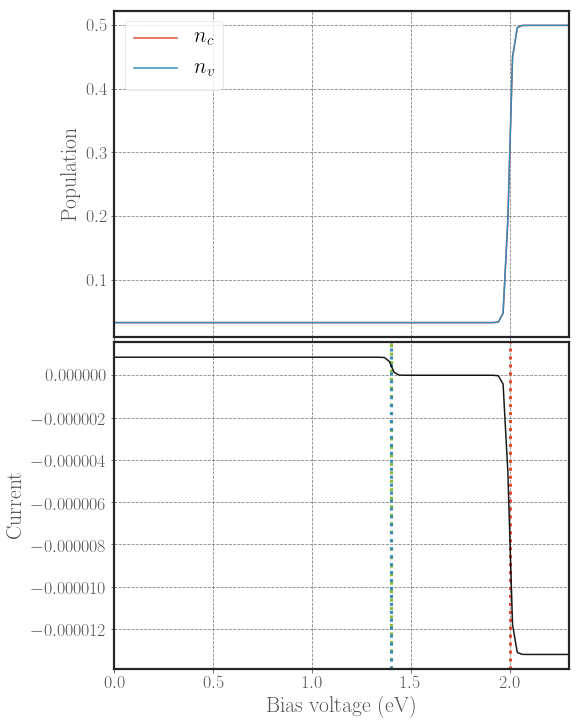

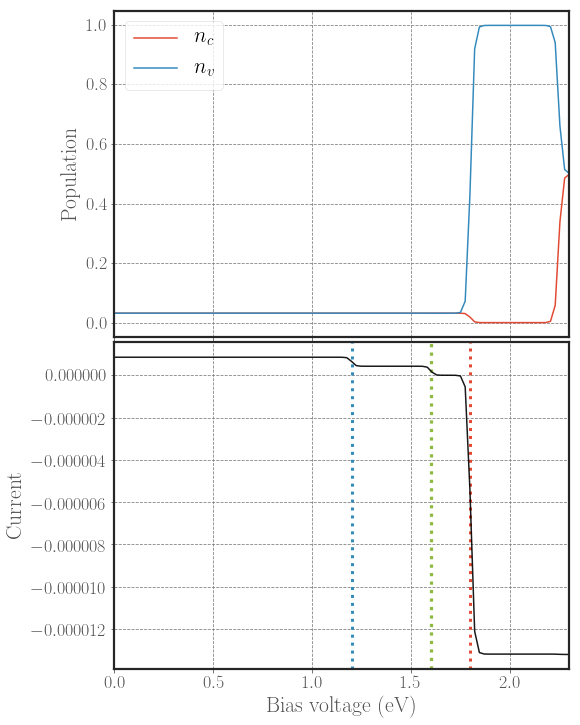

In [174]:
plot_voltage_current(data_dict_BE_1, label='BE-above', limit_y=False, y_offset=0)
plot_voltage_current(data_dict_BE_2, label='BE-central', limit_y=False, y_offset=0)
plot_voltage_current(data_dict_BE_3, label='BE-below', limit_y=False, y_offset=0)